In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving tips - tips.csv to tips - tips.csv


In [0]:
import numpy as np

In [0]:
tips = pd.read_csv('tips - tips.csv')

In [0]:
tips.head()

,total_conta,gorjeta,genero,fumante,dia,horario,pessoas_mesa,tempo_permanencia
0,1699.0,101.0,Feminino,nao,dom,jantar,2,41
1,1034.0,166.0,Masculino,nao,dom,jantar,3,40
2,2101.0,3.5,Masculino,nao,dom,jantar,3,49
3,2368.0,331.0,Masculino,nao,dom,jantar,2,43
4,2459.0,361.0,Feminino,nao,dom,jantar,4,34


In [0]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_conta          244 non-null float64
gorjeta              244 non-null float64
genero               244 non-null object
fumante              244 non-null object
dia                  244 non-null object
horario              244 non-null object
pessoas_mesa         244 non-null int64
tempo_permanencia    244 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 15.3+ KB


**Qual o tempo de permanência médio que os clientes ficam no restaurante?**

In [11]:
media = tips['tempo_permanencia'].mean()
print("A média de tempo é de", round(media, 2), "min")

A média de tempo é de 40.26 min


**Qual a variabilidade desse tempo?**

In [0]:
tips.describe()

,total_conta,gorjeta,pessoas_mesa,tempo_permanencia
count,244.000000,244.000000,244.000000,244.000000
mean,1795.606557,137.938525,2.569672,40.262295
std,999.650888,168.046675,0.951100,5.157285
min,9.600000,1.000000,1.000000,26.000000
25%,1212.750000,2.575000,2.000000,37.000000
50%,1687.500000,5.100000,2.000000,40.000000
75%,2277.500000,265.750000,3.000000,44.000000
max,5081.000000,758.000000,6.000000,53.000000


**Plotar um histograma dessa variável e discutir sobre o formato.**

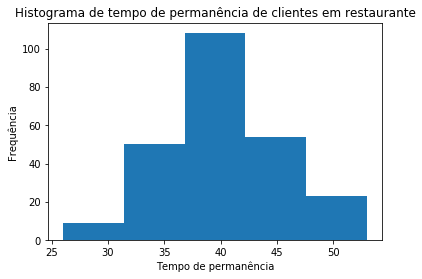

In [9]:
plt.hist(tips['tempo_permanencia'], bins=5)
plt.xlabel('Tempo de permanência')
plt.ylabel('Frequência')
plt.title('Histograma de tempo de permanência de clientes em restaurante')
plt.show()

**Selecionando um cliente aleatório, qual a probabilidade que ele permaneça mais que 40min?**



In [0]:
condicao=[tips['tempo_permanencia']<=40,tips['tempo_permanencia']>40]
rotulo=['permanencia < 40 min','permanencia > 40 min']

tips['tempo_categ']=np.select(condicao,rotulo)
tips['tempo_categ'].value_counts()

permanencia < 40 min    131
permanencia > 40 min    113
Name: tempo_categ, dtype: int64

1.   Número de clientes do restaurante: 244
2.   Número de clientes que permanecem mais que 40min: 113



In [0]:
p = 113/244
print("A probabilidade é de", round(p*100, 2), "%") 

A probabilidade é de 46.31 %


**Pensando na programação do dono do restaurante sobre a quantidade de pessoas que frequentam o estabelecimento, precisamos saber quanto tempo a maioria das pessoas ficam. Qual é o tempo que 95% dos clientes poderiam ter sua refeição tranquilamente?**

Na curva de Gauss dois desvios padrão desde a média representam cerca de 95% dos dados

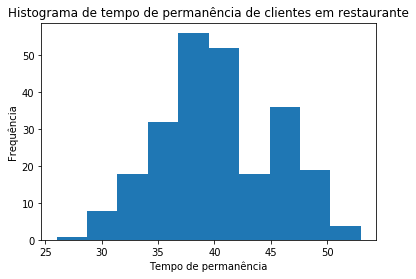

In [0]:
plt.hist(tips['tempo_permanencia'])
plt.xlabel('Tempo de permanência')
plt.ylabel('Frequência')
plt.title('Histograma de tempo de permanência de clientes em restaurante')
plt.show()

In [0]:
desvio_padrao = tips["tempo_permanencia"].std()

In [0]:
#valor mínimo do intervalo de 95%
minimo_95 = media - 2*desvio_padrao

#valor máximo do intervalo de 95%
maximo_95 = media + 2*desvio_padrao

print("Intervalo tempo permanência que representa 95% dos dados:", round(minimo_95, 2), "min -", round(maximo_95, 2), "min")

Intervalo tempo permanência que representa 95% dos dados: 29.95 min - 50.58 min


**Quais os intervalos de tempo estão os 68% mais frequentes?**

In [13]:
#valor mínimo do intervalo de 68.2%
minimo_68 = media - desvio_padrao

#valor mínimo do intervalo de 68.2%
maximo_68 = media + desvio_padrao
print(minimo_68, maximo_68)

35.10501044425533 45.41957971967909


In [14]:
condicao=[tips['tempo_permanencia']<=35.10,tips['tempo_permanencia']<=45.41, tips['tempo_permanencia']>45.41]
rotulo=['permanencia <= 35.10 min','permanencia <= 45.41 min', 'permanencia > 45.41 min']

tips['tempo_categ']=np.select(condicao,rotulo)
tips['tempo_categ'].value_counts()

permanencia <= 45.41 min    155
permanencia > 45.41 min      47
permanencia <= 35.10 min     42
Name: tempo_categ, dtype: int64

In [16]:
#utilizando o intervalo de tempo de permanência <= 45.41 min
155/244*100

63.52459016393443

**Quais os intervalos de tempo estão os 84% mais frequentes?**

In [20]:
print(desvio_padrao, media)

#Z = (b - media)/desvio padrão
#Z foi obtido na tabela de distribuição normal
#na tabela de distribuição normal: 0.50 + metade 0.84 (0.41) = 0.91
#Z=1.41 e -1.41
#intervalo na normal padrão que tem 84% é [-1.41,1.41]
#e voltando Z = (b - media)/desvio padrão
#1.41 = (b - media)/desvio padrão

(1.41*desvio_padrao) + media


5.157284637711886 40.26229508196721


47.53406642114097

**Considerando que valores de tempo permanência estão ordenados, quais são os 84% primeiros dos dados?**

In [22]:
#Z = (b - media)/desvio padrão
#Z foi obtido na tabela de distribuição normal
#na tabela de distribuição normal: 0.84: Z=1
#e voltando Z = (b - media)/desvio padrão
#1.41 = (b - media)/desvio padrão
1*desvio_padrao + media

45.41957971967909